# Aircraft Engine Parts Analysis

## Part Conditions Prediction Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('part_conditions.csv')
df2 = pd.read_csv('defects.csv')
df1.head()

,unit_number,cycle_number,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [3]:
df1.shape

(20631, 27)

In [6]:
df1['cycle_number'].max()

362

In [7]:
units = df1['unit_number'].unique()

In [8]:
units

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

In [9]:
cycles = []
for i in range(0,len(units)):
    temp = df1[df1['unit_number'] == units[i]]
    cycles.append(temp.iloc[-1,1])
min_cycles = min(cycles)
mean_cycles = sum(cycles) / len(cycles)
max_cycles = max(cycles)
print('Minimum: ',min_cycles)
print('Average: ',mean_cycles)
print('Maximum: ',max_cycles)

Minimum:  128
Average:  206.31
Maximum:  362


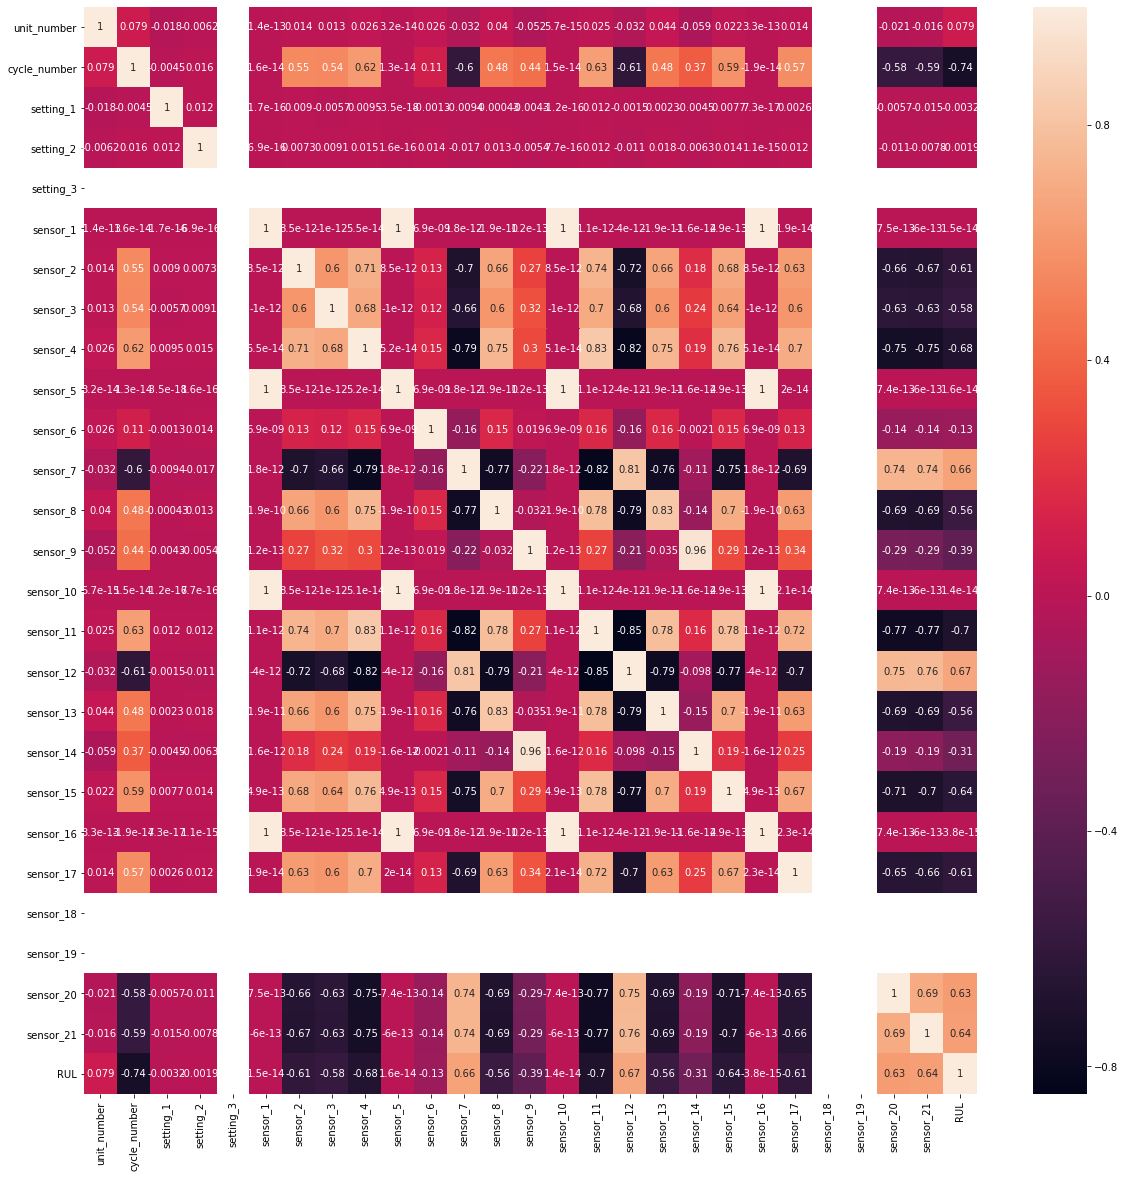

In [10]:
plt.figure(figsize = (20,20))
sns.heatmap(data = df1.corr(),annot=True)
plt.show()

From this heat map it appears that sensor 7, 12, 20, and 21 are the features that are strongly correlated with RUL.

In [11]:
df1.corr()

,unit_number,cycle_number,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
unit_number,1.000000e+00,7.875253e-02,-1.789509e-02,-6.196537e-03,NaN,-1.442696e-13,1.413277e-02,1.262127e-02,2.611585e-02,3.167330e-14,...,4.422982e-02,-5.947341e-02,2.248632e-02,3.320496e-13,1.351334e-02,NaN,NaN,-2.058858e-02,-1.646513e-02,7.875253e-02
cycle_number,7.875253e-02,1.000000e+00,-4.526813e-03,1.613204e-02,NaN,1.613386e-14,5.498980e-01,5.439470e-01,6.245772e-01,1.259112e-14,...,4.775230e-01,3.703236e-01,5.886758e-01,-1.851264e-14,5.669949e-01,NaN,NaN,-5.835969e-01,-5.859234e-01,-7.362406e-01
setting_1,-1.789509e-02,-4.526813e-03,1.000000e+00,1.166044e-02,NaN,-1.669929e-16,9.029868e-03,-5.651101e-03,9.543965e-03,-3.491551e-18,...,2.317787e-03,-4.469388e-03,7.651995e-03,7.268383e-17,2.599198e-03,NaN,NaN,-5.712625e-03,-1.455862e-02,-3.198458e-03
setting_2,-6.196537e-03,1.613204e-02,1.166044e-02,1.000000e+00,NaN,-6.876180e-16,7.266242e-03,9.067833e-03,1.467284e-02,1.623640e-16,...,1.815635e-02,-6.310324e-03,1.415603e-02,1.118654e-15,1.227979e-02,NaN,NaN,-1.055403e-02,-7.845559e-03,-1.947628e-03
setting_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sensor_1,-1.442696e-13,1.613386e-14,-1.669929e-16,-6.876180e-16,NaN,1.000000e+00,8.476569e-12,-1.011335e-12,5.450136e-14,1.000000e+00,...,-1.862063e-11,-1.576482e-12,4.883375e-13,1.000000e+00,1.934015e-14,NaN,NaN,-7.467360e-13,-5.997132e-13,1.535649e-14
sensor_2,1.413277e-02,5.498980e-01,9.029868e-03,7.266242e-03,NaN,8.476569e-12,1.000000e+00,6.026096e-01,7.149492e-01,8.475709e-12,...,6.617924e-01,1.797520e-01,6.759752e-01,8.476474e-12,6.298856e-01,NaN,NaN,-6.618407e-01,-6.680502e-01,-6.064840e-01
sensor_3,1.262127e-02,5.439470e-01,-5.651101e-03,9.067833e-03,NaN,-1.011335e-12,6.026096e-01,1.000000e+00,6.784127e-01,-1.013618e-12,...,6.009632e-01,2.371373e-01,6.399212e-01,-1.013957e-12,6.000172e-01,NaN,NaN,-6.259414e-01,-6.339008e-01,-5.845204e-01
sensor_4,2.611585e-02,6.245772e-01,9.543965e-03,1.467284e-02,NaN,5.450136e-14,7.149492e-01,6.784127e-01,1.000000e+00,5.196257e-14,...,7.451584e-01,1.907477e-01,7.584588e-01,5.059435e-14,7.034991e-01,NaN,NaN,-7.480672e-01,-7.451931e-01,-6.789482e-01
sensor_5,3.167330e-14,1.259112e-14,-3.491551e-18,1.623640e-16,NaN,1.000000e+00,8.475709e-12,-1.013618e-12,5.196257e-14,1.000000e+00,...,-1.862170e-11,-1.570319e-12,4.884483e-13,1.000000e+00,2.048523e-14,NaN,NaN,-7.449936e-13,-5.994644e-13,1.561885e-14


In order to recieve a NaN value for the correlation coefficient the denominator of the correlation formula must be 0. In order for this to happen the standard deviation of the x-variable or the y-variable must be 0. This means that the x-values or the y-values must be the same. Therefore in the correlation table the features that have the same value have a NaN correlation coefficient.

In [12]:
df1 = df1.drop(['setting_3','sensor_18','sensor_19'],axis=1)

Since the columns that do not change with any othee feature, it is safe to make an assumption that the feature does not have an effect on the data set and will not have any future consequences if it is dropped. 

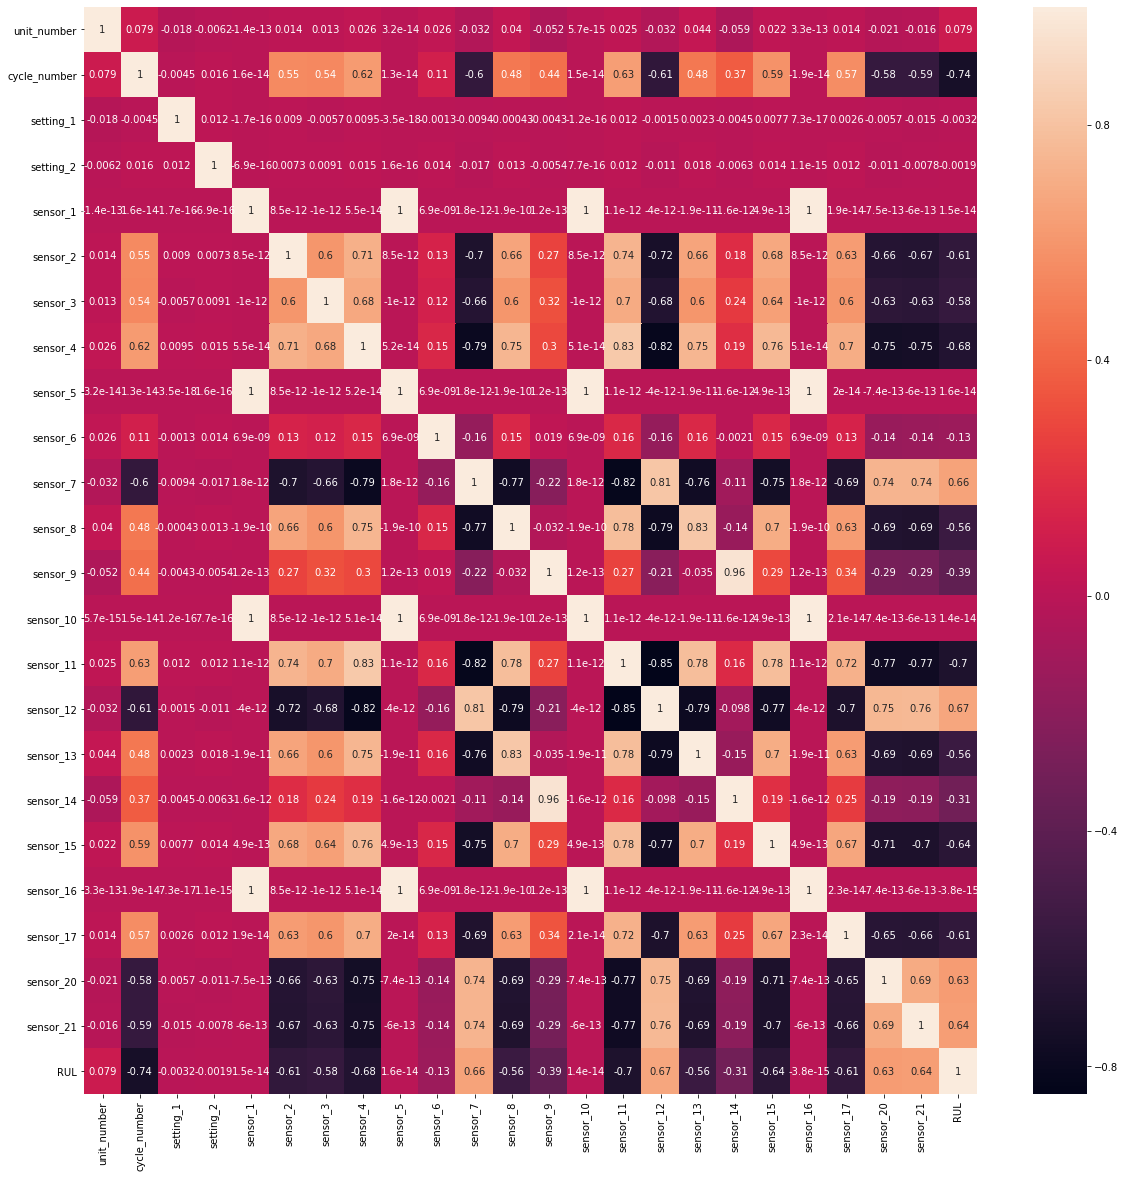

In [13]:
plt.figure(figsize = (20,20))
sns.heatmap(data = df1.corr(),annot=True)
plt.show()

In [14]:
x = df1.drop(['cycle_number','RUL'],axis = 1)
x1 = df1.drop(['unit_number','RUL'],axis = 1)
y = df1['RUL']

#### Linear Regressinon Model 1 

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [16]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
model1.score(x_train,y_train)

0.5858031298794532

In [18]:
y_pred1 = model1.predict(x_test)

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred1)

0.5904585179688147

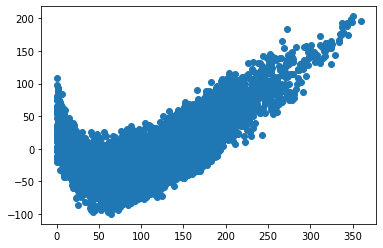

In [20]:
residuals = (y_test - y_pred1)
plt.scatter(y_test, residuals)

Model1 has a r2 score of 0.5865, which is a very low r2 value. The model does not seem to be overfitted because the r2 value for the test data set is the same as the r2 value of the training data set. When the residual scatter plot is analyzed, it can be clearly seen that there is a positive trend to the residual. For a properly fit Linear Regression Model, the residuals must be unpredictable. This means that the model is not valid. 

#### Linear Regression Model 2 

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x1,y,test_size = 0.3)

In [22]:
model2 = LinearRegression()
model2.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
y_pred2 = model2.predict(x_test)

In [24]:
r2_score(y_test,y_pred2)

0.6529051126314318

In [25]:
model2.score(x_train,y_train)

0.6563528323210412

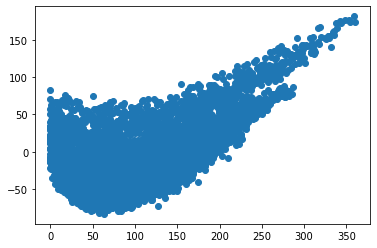

In [26]:
residuals = (y_test - y_pred2)
plt.scatter(y_test, residuals)

The r2 value for model2 is slightly improved than the r2 value of model1. This improvement in the score is because of the features that are being inputted. Model 2 has 'cycle_number' in the input feature list. Model1 had 'unit_number', this points to the fact that 'unit_number' is not an important feature and has no effect on the model fitting. Model2 does not seem to be overfitted because the r2 value for the training data and the test data are the same. However, the residuals seem to have a positive trend hence this model is invalid. 

One possible reason for the low model scores is due to the features present in our input features. One or multiple features is causing the model to be invalid. 

Both of these models are predicting the **Remaining Useful Life** of a unit. This is the output of the model. The input of the model are the various readings from sensors and settings that provides insight on the state of the Unit. The model takes in the various readings and predicts the **Remaining Useful Life**. The difference between ***Model_1*** and ***Model_2*** is the input features. ***Model_1*** contains the feature "Unit_Number" and does not contain the feature "Cycle_number". ***Model_2*** is the opposite. Due to the higher r2 score of ***Model_2*** it can be interperted that "Cycle_Number" is more important than "Unit_number" feature. This makes sense because the "Cycle_Number" that a current unit is on provides more information about how many cycles are left rather than the "Unit_Number".

#### Recursive Feature Elimination 

In [27]:
from sklearn.feature_selection import RFE
rfe = RFE(model2)
fit = rfe.fit(x_train,y_train)
print(fit.ranking_)

[ 6  1  1  9  1  5  4 10  1  2  1  7 11  1  1  1  8  1 12  3  1  1]


In [28]:
rfe.get_support()

array([False,  True,  True, False,  True, False, False, False,  True,
       False,  True, False, False,  True,  True,  True, False,  True,
       False, False,  True,  True])

In [29]:
features = x_train.columns[rfe.get_support()]
features

Index(['setting_1', 'setting_2', 'sensor_2', 'sensor_6', 'sensor_8',
       'sensor_11', 'sensor_12', 'sensor_13', 'sensor_15', 'sensor_20',
       'sensor_21'],
      dtype='object')

This is the list of features that the RFE model determined were the most important features and have the high predictive power. 

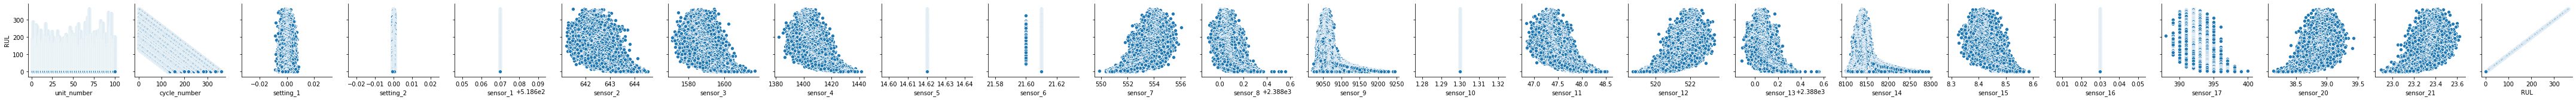

In [30]:
sns.pairplot(data=df1, x_vars = df1.columns, y_vars=['RUL'])

Based on the RFE, Sensor 16, Sensor 10, and sensor 5 had the lowest predictive power with the rank of 12, 11, and 10 respectively. When the pairplot for each of the features are observed, it can be seen that no correlation can be seen among the indepdent variables (the features listed above) and the dependent variable (RUL). For instance, sensor 16 has a vertical line at the value of 0.03 which does not have any correlation with RUL. In fact, in the correlation table, Sensor 16, Sensor 10, and Sensor 5 had the lowest correlation coefficient. 

In [31]:
y = y.clip(upper = min_cycles)
x2 = df1[features]
x2

,setting_1,setting_2,sensor_2,sensor_6,sensor_8,sensor_11,sensor_12,sensor_13,sensor_15,sensor_20,sensor_21
0,-0.0007,-0.0004,641.82,21.61,2388.06,47.47,521.66,2388.02,8.4195,39.06,23.4190
1,0.0019,-0.0003,642.15,21.61,2388.04,47.49,522.28,2388.07,8.4318,39.00,23.4236
2,-0.0043,0.0003,642.35,21.61,2388.08,47.27,522.42,2388.03,8.4178,38.95,23.3442
3,0.0007,0.0000,642.35,21.61,2388.11,47.13,522.86,2388.08,8.3682,38.88,23.3739
4,-0.0019,-0.0002,642.37,21.61,2388.06,47.28,522.19,2388.04,8.4294,38.90,23.4044
5,-0.0043,-0.0001,642.10,21.61,2388.02,47.16,521.68,2388.03,8.4108,38.98,23.3669
6,0.0010,0.0001,642.48,21.61,2388.02,47.36,522.32,2388.03,8.3974,39.10,23.3774
7,-0.0034,0.0003,642.56,21.61,2388.00,47.24,522.47,2388.03,8.4076,38.97,23.3106
8,0.0008,0.0001,642.12,21.61,2388.05,47.29,521.79,2388.05,8.3728,39.05,23.4066
9,-0.0033,0.0001,641.71,21.61,2388.05,47.03,521.79,2388.06,8.4286,38.95,23.4694


#### Linear Regression Model 3 

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x2,y,test_size = 0.3)
model3 = LinearRegression()
model3.fit(x_train,y_train)
model3.score(x_train,y_train)

0.6797720843616992

In [33]:
y_pred3 = model3.predict(x_test)
r2_score(y_test,y_pred3)

0.6754833368873484

This model is trained using the input features that were ranked using RFE and the clipped RUL output data. This score is highest out of all the three models that were trained. However, compared to the second model without the clipped output data and the new input features, the score has slightly improved. 

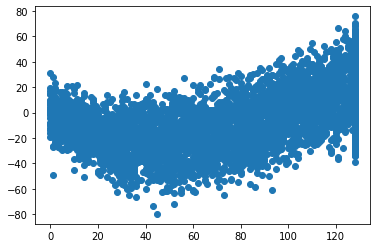

In [34]:
residuals = (y_test - y_pred3)
plt.scatter(y_test, residuals)

Compared to the previous residuals plot, there is more randomness to this plot. A clear trend is not visible in the residual plot. Hence, this model is valid for predicting the RUL of a machine. 

## Mechanical Defect Classification

In [35]:
df2.tail()

,Unnamed: 0,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,fault_type
1835,1935,238,287,315114,315142,671,91,39,86424,119,...,0.5385,0.7179,0.0,2.8267,1.6902,1.4472,-0.4286,0.0062,0.9992,Other_Faults
1836,1937,144,175,340581,340598,287,44,24,34599,112,...,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173,Other_Faults
1837,1938,145,174,386779,386794,292,40,22,37572,120,...,0.7250,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079,Other_Faults
1838,1939,137,170,422497,422528,419,97,47,52715,117,...,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919,Other_Faults
1839,1940,1261,1281,87951,87967,103,26,22,11682,101,...,0.7692,0.7273,0.0,2.0128,1.3010,1.2041,-0.2000,-0.1139,0.5296,Other_Faults


In [36]:
df2.shape

(1840, 29)

In [37]:
df2['fault_type'].value_counts().unique

<bound method Series.unique of Other_Faults    628
Bumps           385
K_Scatch        376
Z_Scratch       180
Pastry          152
Stains           68
Dirtiness        51
Name: fault_type, dtype: int64>

These are the different types of faults there are in the 'fault_type' column. 

In [38]:
output = {'Other_Faults':0,'Bumps':1,'K_Scatch':2,'Z_Scratch':3,'Pastry':4,'Stains':5,'Dirtiness':6}

In [42]:
df2['fault'] = ''
for i in range(0,1840):
    df2.iloc[i,29] = output[df2.iloc[i,28]]

In [43]:
df2

,Unnamed: 0,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,fault_type,fault
0,0,42,50,270900,270944,267,17,44,24220,76,...,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry,4
1,1,645,651,2538079,2538108,108,10,30,11397,84,...,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry,4
2,2,829,835,1553913,1553931,71,8,19,7972,99,...,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry,4
3,3,853,860,369370,369415,176,13,45,18996,99,...,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry,4
4,4,1289,1306,498078,498335,2409,60,260,246930,37,...,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry,4
5,5,430,441,100250,100337,630,20,87,62357,64,...,1.0000,1.0,2.7993,1.0414,1.9395,0.8736,-0.2267,0.9874,Pastry,4
6,6,413,446,138468,138883,9052,230,432,1481991,23,...,0.9607,1.0,3.9567,1.5185,2.6181,0.9205,0.2791,1.0000,Pastry,4
7,7,190,200,210936,210956,132,11,20,20007,124,...,1.0000,1.0,2.1206,1.0000,1.3010,0.5000,0.1841,0.3359,Pastry,4
8,8,330,343,429227,429253,264,15,26,29748,53,...,1.0000,1.0,2.4216,1.1139,1.4150,0.5000,-0.1197,0.5593,Pastry,4
9,9,74,90,779144,779308,1506,46,167,180215,53,...,0.9820,1.0,3.1778,1.2041,2.2148,0.9024,-0.0651,1.0000,Pastry,4


In [51]:
X = df2.drop(['fault_type','Unnamed: 0','fault'],axis = 1)
Y = df2['fault']

In [52]:
X

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000
5,430,441,100250,100337,630,20,87,62357,64,127,...,0.0079,0.5500,1.0000,1.0,2.7993,1.0414,1.9395,0.8736,-0.2267,0.9874
6,413,446,138468,138883,9052,230,432,1481991,23,199,...,0.0196,0.1435,0.9607,1.0,3.9567,1.5185,2.6181,0.9205,0.2791,1.0000
7,190,200,210936,210956,132,11,20,20007,124,172,...,0.0059,0.9091,1.0000,1.0,2.1206,1.0000,1.3010,0.5000,0.1841,0.3359
8,330,343,429227,429253,264,15,26,29748,53,148,...,0.0077,0.8667,1.0000,1.0,2.4216,1.1139,1.4150,0.5000,-0.1197,0.5593
9,74,90,779144,779308,1506,46,167,180215,53,143,...,0.0095,0.3478,0.9820,1.0,3.1778,1.2041,2.2148,0.9024,-0.0651,1.0000


In [53]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)

In [54]:
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression()
model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)

C:\Users\rithv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rithv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [55]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred4)
print(cm)

[[178  10   8   0   0   3   0]
 [ 99  18   0   0   0   0   0]
 [ 21   0  95   0   0   0   0]
 [ 49   0   1   0   0   0   0]
 [ 32   5   0   0   0   0   0]
 [  4   0   0   0   0  17   0]
 [ 12   0   0   0   0   0   0]]


In [56]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred4))

Accuracy: 0.5579710144927537


In this confusion matrix, the row are the actual values and the columns are the predicted values. The order of the rows and columns are: Other Faults, Bumps, K_Scratch, Z_Scratch, Pastry, Stain, and Dirtiness. From this confusion matrix it can be seen that algorithm classifies many different types of faults as "Other_Faults". This can be seen in the first column of the confusion matrix. The high numbers in each row except the 1st row in the 1st column explains that "Other_Fault" is the most improperly classified. In addition, the model is not classifying any input data as Z_Scratch, Pastry, and Dirtiness. This is why those columns all have values of 0. Hence, when the accuracy is calculated, we recieve a low value of 55%.    

In [59]:
model5 = LogisticRegression(max_iter = 200)
model5.fit(x_train,y_train)
y_pred5 = model5.predict(x_test)

cm = metrics.confusion_matrix(y_test, y_pred5)
print(cm)

[[178  10   8   0   0   3   0]
 [ 99  18   0   0   0   0   0]
 [ 21   0  95   0   0   0   0]
 [ 49   0   1   0   0   0   0]
 [ 32   5   0   0   0   0   0]
 [  4   0   0   0   0  17   0]
 [ 12   0   0   0   0   0   0]]


C:\Users\rithv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rithv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [60]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred5))

Accuracy: 0.5579710144927537


In [61]:
model6 = LogisticRegression(max_iter = 5000)
model6.fit(x_train,y_train)
y_pred6 = model6.predict(x_test)

cm = metrics.confusion_matrix(y_test, y_pred6)
print(cm)

[[178  10   8   0   0   3   0]
 [ 99  18   0   0   0   0   0]
 [ 21   0  95   0   0   0   0]
 [ 49   0   1   0   0   0   0]
 [ 32   5   0   0   0   0   0]
 [  4   0   0   0   0  17   0]
 [ 12   0   0   0   0   0   0]]


C:\Users\rithv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rithv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [62]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred6))

Accuracy: 0.5579710144927537


Based on the results, it appears that chaning the number of iterations did not improve the accuracy of the model. They remained the same as the original Logistic Regression model with the default value for the max_iter. This means that no matter how many iterations there are the model converges to the same result.

In [65]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_scaled = sc.fit_transform(X)

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,Y,test_size = 0.3)

In [67]:
model7 = LogisticRegression()
model7.fit(x_train,y_train)
y_pred7 = model7.predict(x_test)

cm = metrics.confusion_matrix(y_test, y_pred7)
print(cm)

[[115  38  14   6  13   1   2]
 [ 46  71   1   1   3   1   0]
 [  6   0  98   0   0   0   0]
 [  2   5   1  51   0   0   0]
 [ 18   4   0   2  17   0   0]
 [  5   0   0   0   0  16   0]
 [  8   1   0   0   1   0   5]]


C:\Users\rithv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rithv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [69]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred7))

Accuracy: 0.6757246376811594


Scaling the input values improved the accuracy of the model. In the previous Logistic Regression models,  the model was not classifying any output data as Z_Scratch, Pastry, and Dirtiness. However, after scaling, this is not the case anymore. The new model is able to classify the output into all of the 7 different classifications available. Scaling ensures that all of the data for all of the input features are scaled. This ensures that the model is not biased due to the large magnitude values present. This is a reason why the model improved its accuracy after scaling. The model was not classifying everything as 'Other_Faults' due to the magnitude of the input values. Scaling ensured that all of them are in the same scale. 

In [77]:
C = [0.1,1,10,100,1000,10000]
for c in C:
    print(c)
    model8 = LogisticRegression(C = c,max_iter = 10000)
    model8.fit(x_train,y_train)
    y_pred8 = model8.predict(x_test)
    cm = metrics.confusion_matrix(y_test, y_pred8)
    print(cm)
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred8))

0.1
[[138  30  14   6   1   0   0]
 [ 55  64   2   2   0   0   0]
 [ 10   1  93   0   0   0   0]
 [  2   8   1  48   0   0   0]
 [ 31   4   0   2   4   0   0]
 [ 21   0   0   0   0   0   0]
 [ 13   1   0   0   1   0   0]]
Accuracy: 0.6286231884057971
1
[[115  38  14   6  13   1   2]
 [ 46  71   1   1   3   1   0]
 [  6   0  98   0   0   0   0]
 [  2   5   1  51   0   0   0]
 [ 18   4   0   2  17   0   0]
 [  5   0   0   0   0  16   0]
 [  8   1   0   0   1   0   5]]
Accuracy: 0.6757246376811594
10
[[116  37   9   7  14   2   4]
 [ 42  73   1   2   4   0   1]
 [  2   0 102   0   0   0   0]
 [  2   3   1  53   0   0   0]
 [ 15   3   0   2  21   0   0]
 [  1   0   0   0   0  20   0]
 [  5   1   0   0   1   0   8]]
Accuracy: 0.7119565217391305
100


C:\Users\rithv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rithv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\rithv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rithv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\rithv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

[[116  37   7   7  16   2   4]
 [ 41  71   1   3   5   1   1]
 [  1   0 102   0   1   0   0]
 [  1   3   1  54   0   0   0]
 [ 12   3   0   1  25   0   0]
 [  0   0   0   0   0  21   0]
 [  5   1   0   0   1   0   8]]
Accuracy: 0.7192028985507246
1000
[[118  36   6   8  14   3   4]
 [ 38  73   1   3   6   1   1]
 [  2   1 100   0   1   0   0]
 [  1   2   1  55   0   0   0]
 [ 12   3   0   1  25   0   0]
 [  1   0   0   0   0  20   0]
 [  5   1   0   0   1   0   8]]
Accuracy: 0.7228260869565217
10000


C:\Users\rithv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rithv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\rithv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rithv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[115  39   5   8  16   3   3]
 [ 36  75   1   3   6   1   1]
 [  2   2  99   0   1   0   0]
 [  1   2   1  55   0   0   0]
 [ 13   3   0   1  24   0   0]
 [  1   0   0   0   0  20   0]
 [  5   1   0   0   1   0   8]]
Accuracy: 0.717391304347826


The optimal value of C is 1000 because the model with this hyperparameter has the highest accuracy. Overall, as the C-value increases, so does the accuracy of the model. However after a certain point, the accuracy starts decreasing. This is visible when the accuracy for when C = 10000 is lower than when C = 1000. Including Regularization in this model improved the overall model. The classification improved.